In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

dataset = pd.read_csv("Melbourne_housing_FULL.csv")

In [2]:
print(dataset.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0   3/9/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2   4/2/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3   4/2/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4   4/3/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

In [3]:
workdata = dataset[["Rooms","Price","Distance","Bedroom2", "Bathroom","Car","Landsize","BuildingArea",
                    "YearBuilt","Type", "Suburb", "Lattitude", "Longtitude"]]
print(workdata)

       Rooms      Price  Distance  Bedroom2  Bathroom  Car  Landsize  \
0          2        NaN       2.5       2.0       1.0  1.0     126.0   
1          2  1480000.0       2.5       2.0       1.0  1.0     202.0   
2          2  1035000.0       2.5       2.0       1.0  0.0     156.0   
3          3        NaN       2.5       3.0       2.0  1.0       0.0   
4          3  1465000.0       2.5       3.0       2.0  0.0     134.0   
...      ...        ...       ...       ...       ...  ...       ...   
34852      4  1480000.0       6.3       4.0       1.0  3.0     593.0   
34853      2   888000.0       6.3       2.0       2.0  1.0      98.0   
34854      2   705000.0       6.3       2.0       1.0  2.0     220.0   
34855      3  1140000.0       6.3       NaN       NaN  NaN       NaN   
34856      2  1020000.0       6.3       2.0       1.0  0.0     250.0   

       BuildingArea  YearBuilt Type      Suburb  Lattitude  Longtitude  
0               NaN        NaN    h  Abbotsford  -37.80140   1

In [4]:
workdata.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


In [5]:
workdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         34857 non-null  int64  
 1   Price         27247 non-null  float64
 2   Distance      34856 non-null  float64
 3   Bedroom2      26640 non-null  float64
 4   Bathroom      26631 non-null  float64
 5   Car           26129 non-null  float64
 6   Landsize      23047 non-null  float64
 7   BuildingArea  13742 non-null  float64
 8   YearBuilt     15551 non-null  float64
 9   Type          34857 non-null  object 
 10  Suburb        34857 non-null  object 
 11  Lattitude     26881 non-null  float64
 12  Longtitude    26881 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 3.5+ MB


In [6]:
workdata.isna().sum()/workdata.shape[0]    # pct of NA's

Rooms           0.000000
Price           0.218321
Distance        0.000029
Bedroom2        0.235735
Bathroom        0.235993
Car             0.250394
Landsize        0.338813
BuildingArea    0.605761
YearBuilt       0.553863
Type            0.000000
Suburb          0.000000
Lattitude       0.228821
Longtitude      0.228821
dtype: float64

In [7]:
num_rows = workdata.shape[0]
print(num_rows)

34857


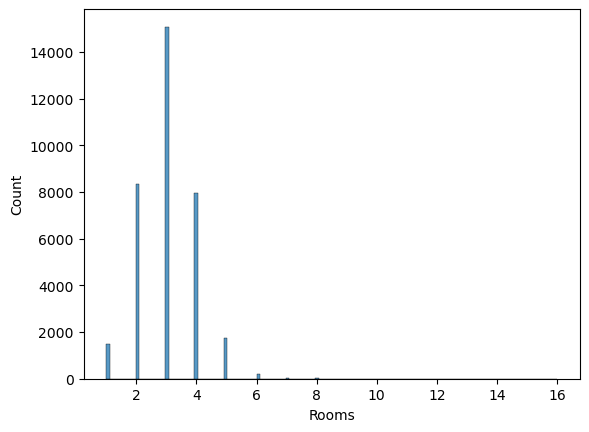

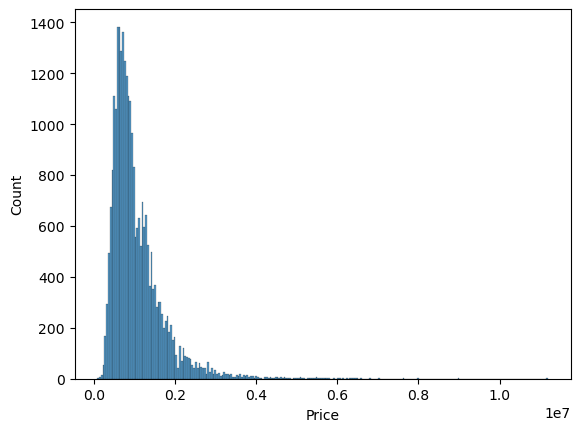

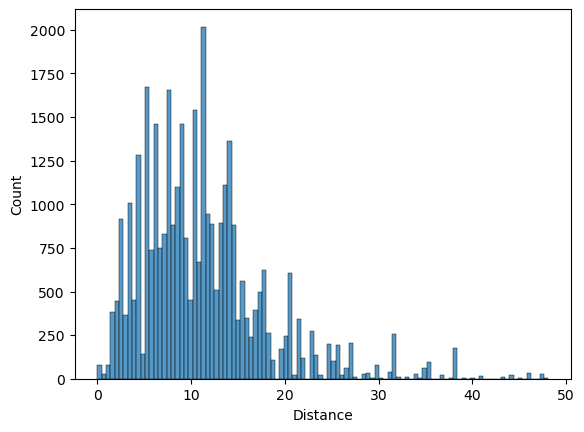

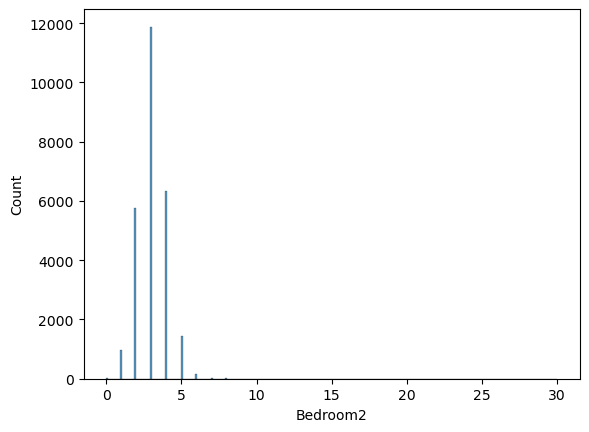

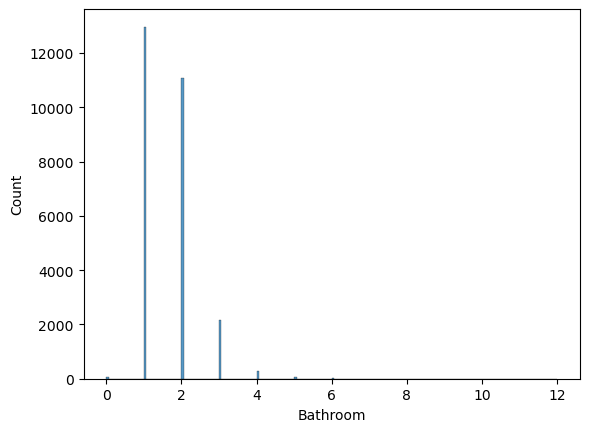

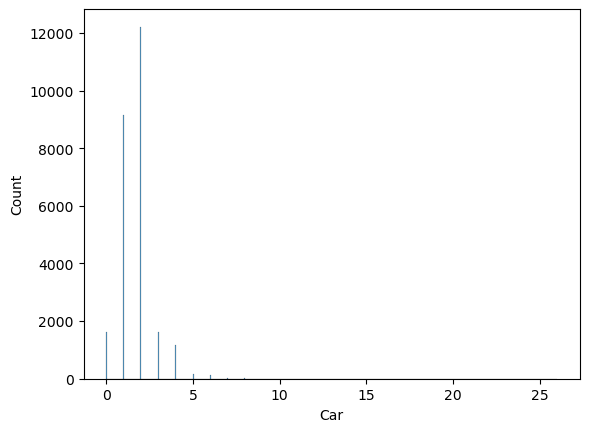

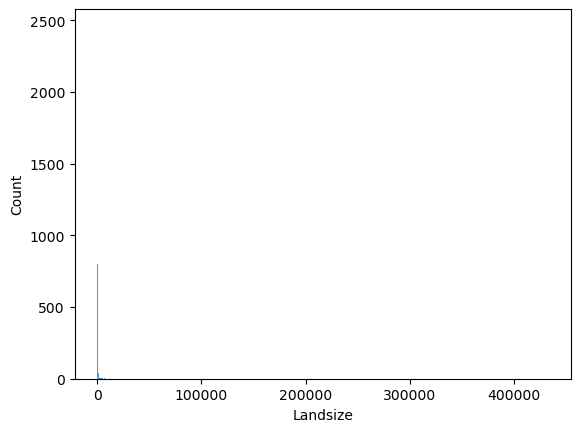

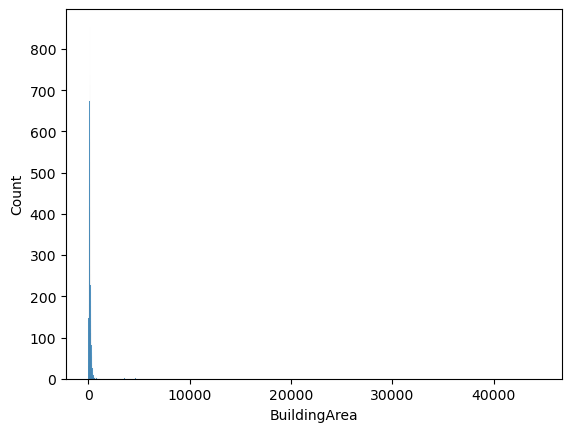

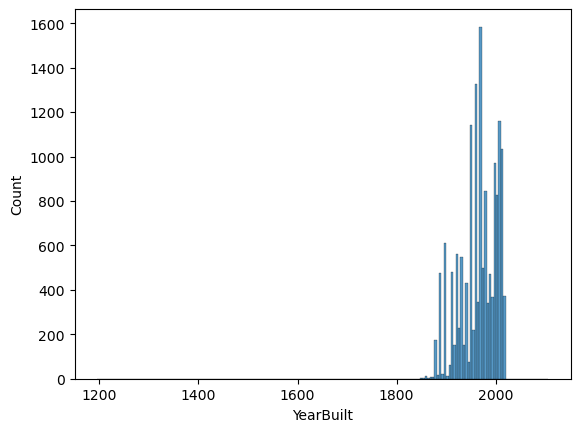

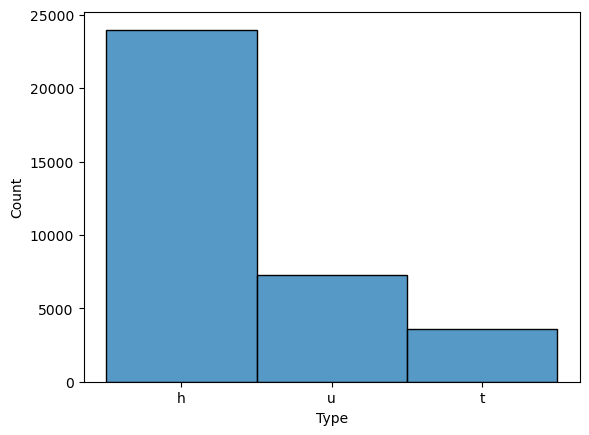

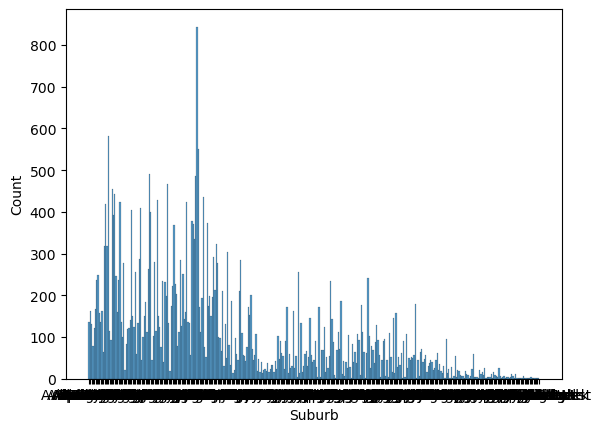

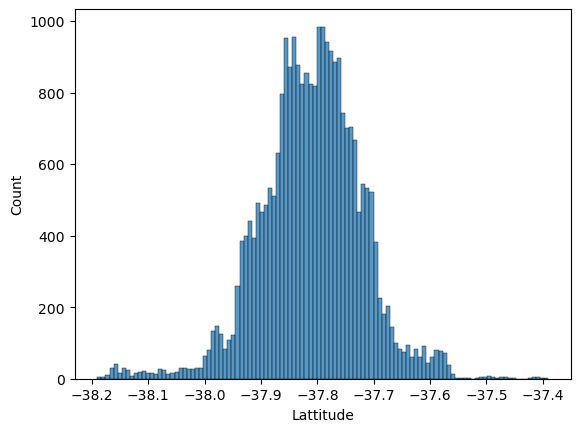

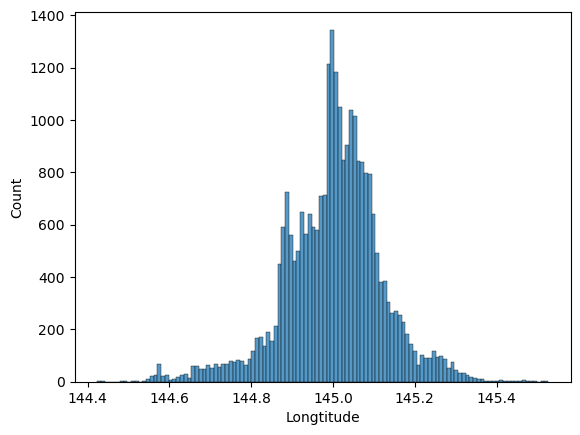

In [8]:
# histograms
for i in workdata.columns:
    sns.histplot(workdata[i])
    plt.xlabel(i)
    plt.show()

In [9]:
# frequency of missing cols by row
print("% Rows at least 1 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 0].shape[0]/num_rows,3)))
print("% Rows at least 2 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 1].shape[0]/num_rows,3)))
print("% Rows at least 3 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 2].shape[0]/num_rows,3)))
print("% Rows at least 4 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 3].shape[0]/num_rows,3)))
print("% Rows at least 5 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 4].shape[0]/num_rows,3)))
print("% Rows at least 7 missing value {}".format(round(workdata[workdata.isna().sum(axis=1) > 6].shape[0]/num_rows,3)))

% Rows at least 1 missing value 0.745
% Rows at least 2 missing value 0.577
% Rows at least 3 missing value 0.345
% Rows at least 4 missing value 0.251
% Rows at least 5 missing value 0.237
% Rows at least 7 missing value 0.23


In [10]:
# removing rows if has more than 3 missing values
workdata = workdata[workdata.isnull().sum(axis=1) <=3]

In [11]:
print(workdata.shape[0])

26117


In [12]:
# missing data with imputation

# replace missing with mode for bedrooms/bath/cars
fill_w_mode = ['Bedroom2', 'Bathroom', 'Car']

for i in fill_w_mode:
    if workdata[i].isna().sum() == 0 : continue    # check if missing values
    IMP = "IMP_" + i
    workdata[ IMP ] = workdata[i]
    workdata.loc[ workdata[IMP].isna(), IMP ] = workdata[i].mode()[0]     # replace with mode
    workdata = workdata.drop(i, axis=1)   # drop previous col
    
# replace missing with median for remaining
fill_w_mean = ['Price', 'Landsize', 'BuildingArea', 'YearBuilt']

for i in fill_w_mean:
    if workdata[i].isna().sum() == 0 : continue     # check if missing values
    IMP = "IMP" + i
    workdata[ IMP ] = workdata[i]
    workdata.loc[ workdata[IMP].isna(), IMP ] = workdata[i].median()   # replace with median
    workdata = workdata.drop(i, axis=1)

In [13]:
workdata.columns[1:]

Index(['Distance', 'Bedroom2', 'Bathroom', 'Type', 'Suburb', 'Lattitude',
       'Longtitude', 'IMP_Car', 'IMPPrice', 'IMPLandsize', 'IMPBuildingArea',
       'IMPYearBuilt'],
      dtype='object')

In [14]:
# adjusting outliers to 1.5 * IQR
cols = ['Distance', 'Bedroom2', 'Bathroom',
       'IMP_Car', 'IMPPrice', 'IMPLandsize', 'IMPBuildingArea',
       'IMPYearBuilt']

for i in cols:
    col_mean = workdata[i].mean()
    col_sd = workdata[i].std()
    col_max = workdata[i].max()
    col_min = workdata[i].min()
    Q1 = workdata[i].quantile(0.25)
    Q3 = workdata[i].quantile(0.75)
    IQR = Q3 - Q1
    S = 1.5 * IQR
    LB = Q1 - S
    UB = Q3 + S
    if (col_max <= UB) & (col_min >= LB) : continue
    TRUNC = "TRUNC_" + i
    workdata[ TRUNC ] = workdata[i]
    workdata.loc[ workdata[TRUNC] > UB, TRUNC] = UB
    workdata.loc[ workdata[TRUNC] < LB, TRUNC] = LB
    workdata = workdata.drop( i, axis=1 )
        

In [15]:
workdata.describe()

,Rooms,Lattitude,Longtitude,TRUNC_Distance,TRUNC_Bedroom2,TRUNC_Bathroom,TRUNC_IMP_Car,TRUNC_IMPPrice,TRUNC_IMPLandsize,TRUNC_IMPBuildingArea,TRUNC_IMPYearBuilt
count,26117.000000,26108.000000,26108.000000,26117.000000,26117.000000,26117.000000,26117.000000,2.611700e+04,26117.000000,26117.000000,26117.000000
mean,3.099207,-37.810216,145.001465,10.976812,3.079565,1.612187,1.674924,1.003737e+06,481.515143,136.038326,1969.337424
std,0.959750,0.090354,0.120234,5.934077,0.951349,0.675884,0.824011,4.190041e+05,285.193087,10.772415,18.209940
min,1.000000,-38.190430,144.423790,0.000000,0.000000,0.000000,0.000000,8.500000e+04,0.000000,120.000000,1937.500000
25%,3.000000,-37.862578,144.932367,6.400000,2.000000,1.000000,1.000000,7.200000e+05,260.000000,132.000000,1960.000000
50%,3.000000,-37.806800,145.007810,10.300000,3.000000,2.000000,2.000000,9.100000e+05,521.000000,136.000000,1970.000000
75%,4.000000,-37.753595,145.071800,14.000000,4.000000,2.000000,2.000000,1.210000e+06,652.000000,140.000000,1975.000000
max,16.000000,-37.390200,145.526350,25.400000,7.000000,3.500000,3.500000,1.945000e+06,1240.000000,152.000000,1997.500000


In [16]:
workdata.columns

Index(['Rooms', 'Type', 'Suburb', 'Lattitude', 'Longtitude', 'TRUNC_Distance',
       'TRUNC_Bedroom2', 'TRUNC_Bathroom', 'TRUNC_IMP_Car', 'TRUNC_IMPPrice',
       'TRUNC_IMPLandsize', 'TRUNC_IMPBuildingArea', 'TRUNC_IMPYearBuilt'],
      dtype='object')

In [17]:
cols_2 = ['Rooms','TRUNC_Distance',
       'TRUNC_Bedroom2', 'TRUNC_Bathroom', 'TRUNC_IMP_Car', 'TRUNC_IMPPrice',
       'TRUNC_IMPLandsize', 'TRUNC_IMPBuildingArea', 'TRUNC_IMPYearBuilt']

In [18]:
# Transform the data
theScaler = StandardScaler()
theScaler.fit(workdata[cols_2])

StandardScaler()

In [19]:
workdata_trn = theScaler.transform(workdata[cols_2])
workdata_trn = pd.DataFrame(workdata_trn)

In [20]:
print(workdata_trn)

              0         1         2         3         4         5         6  \
0     -1.145328 -1.428525 -1.134795 -0.905775 -0.819088 -0.223718 -1.246601   
1     -1.145328 -1.428525 -1.134795 -0.905775 -0.819088  1.136677 -0.980110   
2     -1.145328 -1.428525 -1.134795 -0.905775 -2.032687  0.074614 -1.141407   
3     -0.103370 -1.428525 -0.083636  0.573797 -0.819088 -0.223718 -1.688415   
4     -0.103370 -1.428525 -0.083636  0.573797 -2.032687  1.100877 -1.218549   
...         ...       ...       ...       ...       ...       ...       ...   
26112 -0.103370 -0.788143 -0.083636 -0.905775  0.394512  0.232134 -0.678554   
26113  0.938588 -0.788143  0.967524 -0.905775  1.608111  1.136677  0.390918   
26114 -1.145328 -0.788143 -1.134795  0.573797 -0.819088 -0.276224 -1.344782   
26115 -1.145328 -0.788143 -1.134795 -0.905775  0.394512 -0.712983 -0.916993   
26116 -1.145328 -0.788143 -1.134795 -0.905775 -2.032687  0.038814 -0.811799   

              7         8  
0     -0.003558  0.0363

In [21]:
cols = ["Rooms","Price","Distance","Bedroom2", "Bathroom","Car","Landsize","BuildingArea","YearBuilt"]

workdata_trn.columns = cols    

In [22]:
workdata_trn

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-1.145328,-1.428525,-1.134795,-0.905775,-0.819088,-0.223718,-1.246601,-0.003558,0.036386
1,-1.145328,-1.428525,-1.134795,-0.905775,-0.819088,1.136677,-0.980110,-0.003558,0.036386
2,-1.145328,-1.428525,-1.134795,-0.905775,-2.032687,0.074614,-1.141407,-1.488861,-1.748388
3,-0.103370,-1.428525,-0.083636,0.573797,-0.819088,-0.223718,-1.688415,-0.003558,0.036386
4,-0.103370,-1.428525,-0.083636,0.573797,-2.032687,1.100877,-1.218549,1.296083,-1.748388
...,...,...,...,...,...,...,...,...,...
26112,-0.103370,-0.788143,-0.083636,-0.905775,0.394512,0.232134,-0.678554,-0.003558,0.036386
26113,0.938588,-0.788143,0.967524,-0.905775,1.608111,1.136677,0.390918,-0.003558,0.036386
26114,-1.145328,-0.788143,-1.134795,0.573797,-0.819088,-0.276224,-1.344782,-1.488861,1.546579
26115,-1.145328,-0.788143,-1.134795,-0.905775,0.394512,-0.712983,-0.916993,-1.488861,1.546579


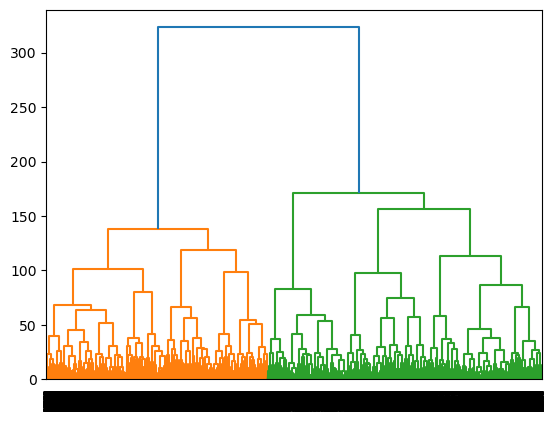

In [222]:
# start with hierarchical clustering agglomerative
dendrogram = sch.dendrogram(sch.linkage(workdata_trn, method='ward'))

C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


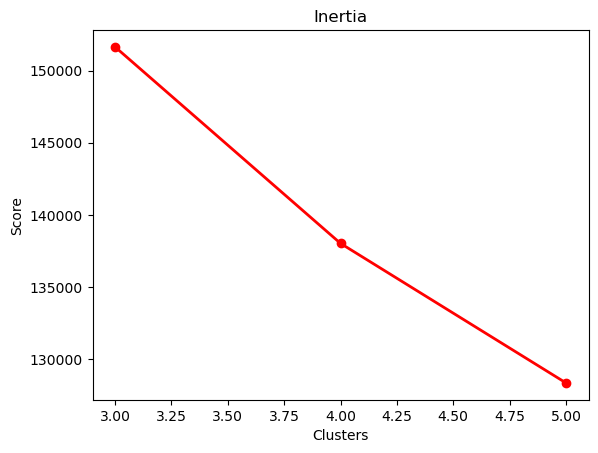

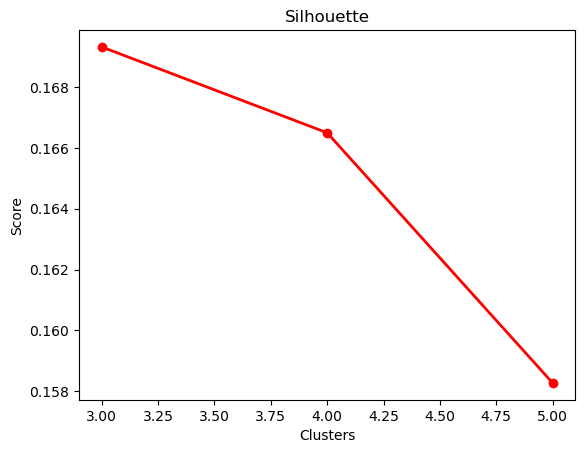

In [23]:
K_LIST = []
I_LIST = []
S_LIST = []

for K in range(3,6):
    km = KMeans(n_clusters = K, random_state = 1)
    km.fit( workdata_trn )
    K_LIST.append( K )       # save range into a list
    I_LIST.append( km.inertia_ )  
    S_LIST.append( silhouette_score(workdata_trn, km.labels_ ) )
    

def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K, SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()
    
drawElbow( K_LIST, I_LIST, "Inertia")
drawElbow( K_LIST, S_LIST, "Silhouette")

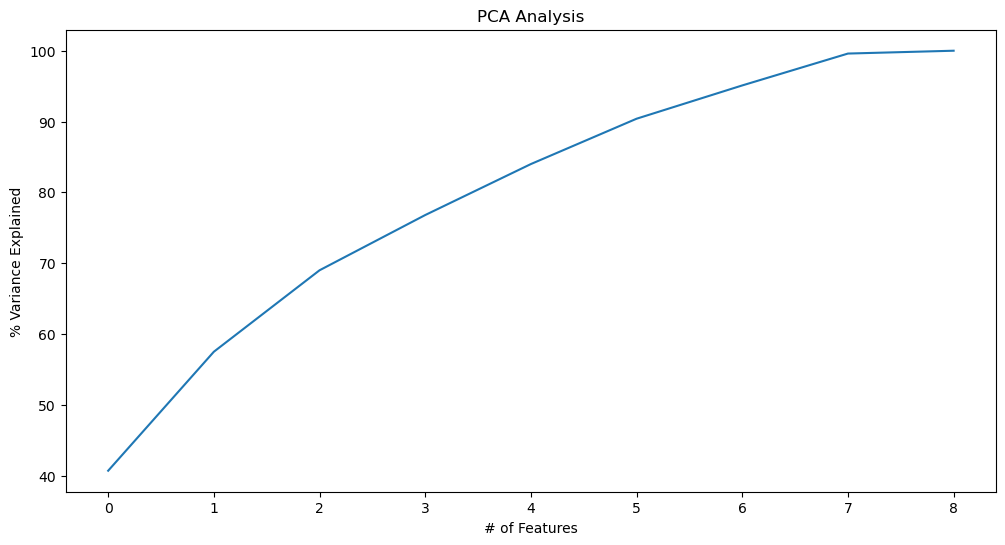

In [24]:
# feature reduction via PCA
pca = PCA(n_components=workdata_trn.shape[1])
pca.fit(workdata_trn)
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)

In [25]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(workdata_trn)
pca_components_df = pd.DataFrame(pca_components, columns=['pc1', 'pc2', 'pc3'])

print(pca.explained_variance_ratio_, "\n")
print(pca_components_df.head())

[0.4071129  0.16762701 0.11536066] 

        pc1       pc2       pc3
0 -2.388848  0.852836 -0.877705
1 -1.968575  1.565976 -0.748842
2 -3.213652  2.077463  0.385759
3 -0.953179  1.074065 -1.752587
4 -0.471749  2.971954 -1.038911


In [33]:
# t-SNE     https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_components)

C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


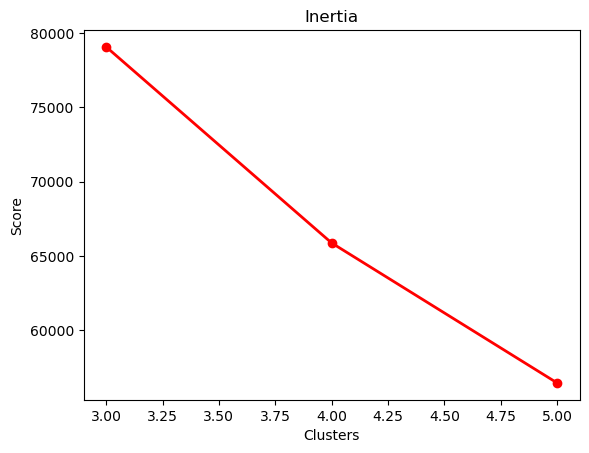

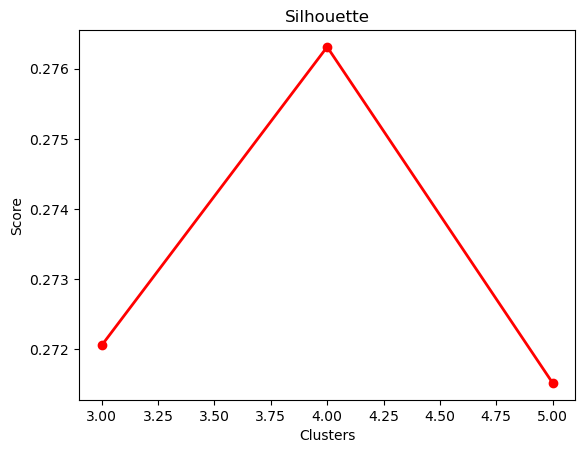

In [34]:
# k optimal with PCA
K_LIST = []
I_LIST = []
S_LIST = []

for K in range(3,6):
    km = KMeans(n_clusters = K, random_state = 1)
    km.fit( pca_components_df )
    K_LIST.append( K )       # save range into a list
    I_LIST.append( km.inertia_ )  
    S_LIST.append( silhouette_score(pca_components_df, km.labels_ ) )
    

def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K, SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()
    
drawElbow( K_LIST, I_LIST, "Inertia")
drawElbow( K_LIST, S_LIST, "Silhouette")

C:\Users\richd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


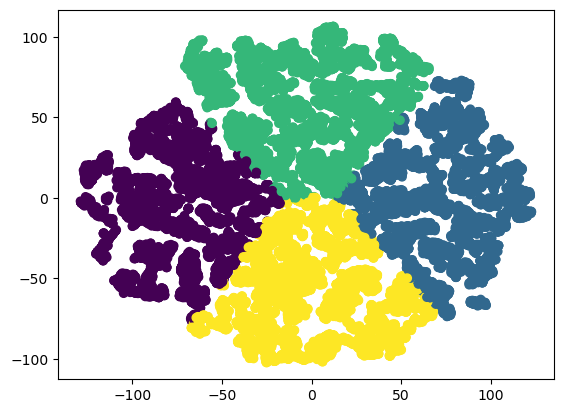

In [35]:
# K means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tsne_result)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_)
plt.show()

In [43]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [36]:
labels_pca

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 2])

In [47]:
workdata_2 = workdata.reset_index(drop=True).copy()

In [48]:
workdata_2['kmeans_clusters'] = kmeans.labels_

In [49]:
workdata_2.head()

,Rooms,Type,Suburb,Lattitude,Longtitude,TRUNC_Distance,TRUNC_Bedroom2,TRUNC_Bathroom,TRUNC_IMP_Car,TRUNC_IMPPrice,TRUNC_IMPLandsize,TRUNC_IMPBuildingArea,TRUNC_IMPYearBuilt,kmeans_clusters
0,2,h,Abbotsford,-37.8014,144.9958,2.5,2.0,1.0,1.0,910000.0,126.0,136.0,1970.0,0
1,2,h,Abbotsford,-37.7996,144.9984,2.5,2.0,1.0,1.0,1480000.0,202.0,136.0,1970.0,0
2,2,h,Abbotsford,-37.8079,144.9934,2.5,2.0,1.0,0.0,1035000.0,156.0,120.0,1937.5,2
3,3,u,Abbotsford,-37.8114,145.0116,2.5,3.0,2.0,1.0,910000.0,0.0,136.0,1970.0,2
4,3,h,Abbotsford,-37.8093,144.9944,2.5,3.0,2.0,0.0,1465000.0,134.0,150.0,1937.5,2


In [54]:
workdata_2.groupby(['kmeans_clusters', 'Type']).size()

kmeans_clusters  Type
0                h       2348
                 t        536
                 u       3298
1                h       5832
                 t        516
                 u         79
2                h       6368
                 t        296
                 u        401
3                h       5414
                 t        571
                 u        458
dtype: int64

In [55]:
workdata_2.groupby(['Suburb', 'kmeans_clusters']).size().reset_index()

,Suburb,kmeans_clusters,0
0,Abbotsford,0,30
1,Abbotsford,1,7
2,Abbotsford,2,53
3,Abbotsford,3,2
4,Aberfeldie,0,13
...,...,...,...
1005,Yarra Glen,3,1
1006,Yarraville,0,69
1007,Yarraville,1,42
1008,Yarraville,2,138


In [56]:
top_twenty_suburbs = workdata_2['Suburb'].value_counts().head(20)
print(top_twenty_suburbs)

Reservoir         564
Richmond          402
Bentleigh East    399
Preston           375
Glen Iris         375
Brunswick         347
Brighton          347
Kew               346
Coburg            341
Northcote         337
South Yarra       325
Balwyn North      325
Essendon          323
Hawthorn          323
Camberwell        296
Brighton East     293
Malvern East      291
Pascoe Vale       272
Port Melbourne    268
Glenroy           263
Name: Suburb, dtype: int64


In [58]:
suburb_count = workdata_2.groupby(['Suburb', 'kmeans_clusters']).size().reset_index()

In [59]:
suburb_count

,Suburb,kmeans_clusters,0
0,Abbotsford,0,30
1,Abbotsford,1,7
2,Abbotsford,2,53
3,Abbotsford,3,2
4,Aberfeldie,0,13
...,...,...,...
1005,Yarra Glen,3,1
1006,Yarraville,0,69
1007,Yarraville,1,42
1008,Yarraville,2,138


In [60]:
sub_0 = suburb_count[suburb_count['kmeans_clusters'] == 0.0][['Suburb', 0]]
sub_1 = suburb_count[suburb_count['kmeans_clusters'] == 1.0][['Suburb', 0]]
sub_2 = suburb_count[suburb_count['kmeans_clusters'] == 2.0][['Suburb', 0]]
sub_3 = suburb_count[suburb_count['kmeans_clusters'] == 3.0][['Suburb', 0]]
print(sub_0[0].sum())
print(sub_1[0].sum())
print(sub_2[0].sum())
print(sub_3[0].sum())

6182
6427
7065
6443


In [62]:
top_twenty_suburbs_df = pd.DataFrame(top_twenty_suburbs).reset_index()
top_twenty_suburbs_df = top_twenty_suburbs_df.rename(columns = {'index': 'Suburb', 'Suburb': 'Total'})
print(top_twenty_suburbs_df)

            Suburb  Total
0        Reservoir    564
1         Richmond    402
2   Bentleigh East    399
3          Preston    375
4        Glen Iris    375
5        Brunswick    347
6         Brighton    347
7              Kew    346
8           Coburg    341
9        Northcote    337
10     South Yarra    325
11    Balwyn North    325
12        Essendon    323
13        Hawthorn    323
14      Camberwell    296
15   Brighton East    293
16    Malvern East    291
17     Pascoe Vale    272
18  Port Melbourne    268
19         Glenroy    263


In [63]:
top_twenty_suburbs_df = top_twenty_suburbs_df.merge(sub_0, on='Suburb')
top_twenty_suburbs_df = top_twenty_suburbs_df.merge(sub_1, on='Suburb')
top_twenty_suburbs_df = top_twenty_suburbs_df.rename(columns={"0_x": "cluster_0", "0_y": "cluster_1"})
top_twenty_suburbs_df = top_twenty_suburbs_df.merge(sub_2, on='Suburb')
top_twenty_suburbs_df = top_twenty_suburbs_df.merge(sub_3, on='Suburb')
top_twenty_suburbs_df = top_twenty_suburbs_df.rename(columns={"0_x": "cluster_2", "0_y": "cluster_3"})
print(top_twenty_suburbs_df)

            Suburb  Total  cluster_0  cluster_1  cluster_2  cluster_3
0        Reservoir    564        259         66         37        202
1         Richmond    402        161         27        207          7
2   Bentleigh East    399         75        125         52        147
3          Preston    375        108         49        157         61
4        Glen Iris    375         71        118        174         12
5        Brunswick    347        114         24        204          5
6         Brighton    347         53        137        143         14
7              Kew    346         66        111        162          7
8           Coburg    341         91         46        184         20
9        Northcote    337         83         35        214          5
10     South Yarra    325        177         25        117          6
11    Balwyn North    325         25        152        131         17
12        Essendon    323        104         83        124         12
13        Hawthorn  

In [70]:
workdata_2.pivot_table(columns=['kmeans_clusters'], index=['Type'], aggfunc='count')['Rooms']

kmeans_clusters,0,1,2,3
Type,,,,
h,2348,5832,6368,5414
t,536,516,296,571
u,3298,79,401,458


In [71]:
workdata_2.pivot_table(columns=['kmeans_clusters'], index=['Type'], aggfunc='count')['Rooms']

kmeans_clusters,0,1,2,3
Type,,,,
h,2348,5832,6368,5414
t,536,516,296,571
u,3298,79,401,458
